In [1]:
import torch, random
from statistics import mean
from cebmf_torch import cEBMF
import matplotlib.pyplot as plt
# ---- config
NUM_RUNS   = 1
N, P       = 50, 40
NOISE_STD  =  .1
MAXIT      = 50
TOL        = 1e-9   # numerical tolerance for strictness

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] - tol for t in range(len(xs)-1))

def is_strictly_decreasing(xs, tol=0.001):
    # xs[t+1] < xs[t] - tol  for all t
    return all(xs[t+1] < xs[t] + tol for t in range(len(xs)-1))

def one_run(seed):
    # reproducibility
    random.seed(seed)
    torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
    u = torch.rand(N, device=device)
    v = torch.rand(P, device=device)
    Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

    model = cEBMF(data=Y, K=5, prior_F="point_exp",
                 prior_L="point_exp") 
    model.fit(maxit=MAXIT)

    loss_hist = model.obj                       # your stored objective = negative ELBO
    return(loss_hist)
 


results=[]

for i in range(NUM_RUNS):
    results.append( one_run(i))
 

5
2


In [2]:
import matplotlib.pyplot as plt

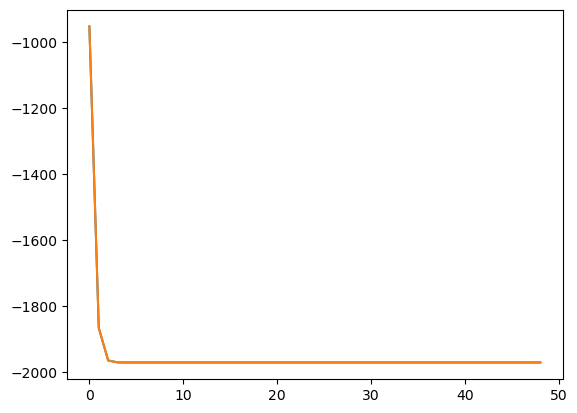

In [3]:
plt.plot(results[0])
for i in range(NUM_RUNS):
    plt.plot(results[i])

In [4]:
h=0

for i in range(NUM_RUNS):
    if (is_strictly_decreasing(results[i], tol=0.1))== False:
        h=h+1
print(h)

0


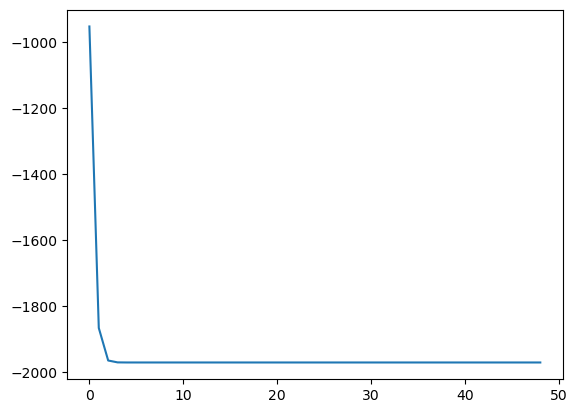

In [5]:
plt.plot(results[0])

In [20]:

random.seed(seed)
torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
u = torch.rand(N, device=device)
v = torch.rand(P, device=device)
Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

model = cEBMF(data=Y, K=5, prior_F="point_exp",
                 prior_L="point_exp") 
model.fit(maxit=MAXIT)

5
2


CEBMFResult(L=tensor([[22.1551],
        [16.0465],
        [10.6857],
        [22.0550],
        [14.5657],
        [17.9611],
        [ 3.3199],
        [ 7.7045],
        [12.7652],
        [ 6.2073],
        [11.4502],
        [ 3.4095],
        [ 8.0816],
        [14.9507],
        [10.7696],
        [ 9.5422],
        [10.3261],
        [ 4.5193],
        [14.5685],
        [17.8808],
        [ 6.1594],
        [15.1051],
        [ 4.1173],
        [10.9823],
        [ 5.0448],
        [13.3205],
        [14.1491],
        [15.3755],
        [15.8940],
        [ 5.3215],
        [18.0361],
        [13.4007],
        [ 4.9488],
        [ 3.8451],
        [10.8224],
        [20.4640],
        [12.0443],
        [12.5387],
        [18.1975],
        [ 9.2695],
        [ 5.6303],
        [ 0.7408],
        [16.3921],
        [ 7.3688],
        [11.6701],
        [10.2662],
        [20.0835],
        [ 0.7622],
        [22.6412],
        [19.4896]], dtype=torch.float32), F=tensor([[0.

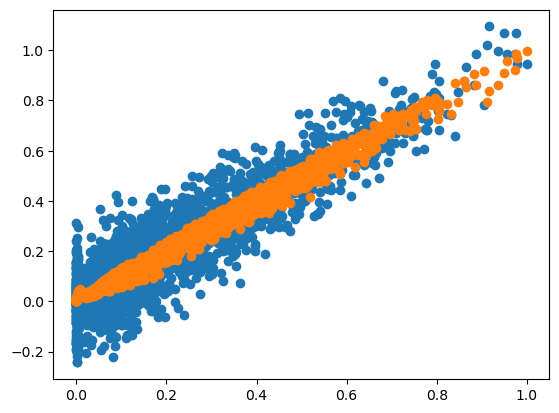

In [18]:
model.update_fitted_value()
plt.scatter(model.Y_fit, Y)
plt.scatter(model.Y_fit, torch.outer(u, v) )

In [21]:
model.obj

[-953.5518404239381,
 -1865.8580418404845,
 -1964.22519690585,
 -1969.9173833765813,
 -1970.1836616341639,
 -1970.1960471710156,
 -1970.1966841695594,
 -1970.1968032965058,
 -1970.1967363235674,
 -1970.1967308710964,
 -1970.1968225341736,
 -1970.1968321580557,
 -1970.1967622716886,
 -1970.196730352462,
 -1970.1968591614898,
 -1970.1967519680968,
 -1970.1967457164114,
 -1970.1966173414235,
 -1970.196761123101,
 -1970.1969514206558,
 -1970.1968401282545,
 -1970.1971898716035,
 -1970.1967089800746,
 -1970.1967057381737,
 -1970.1967987080411,
 -1970.1968486331027,
 -1970.1967853965816,
 -1970.1968492819713,
 -1970.1967333182151,
 -1970.1967545519926,
 -1970.1967844805704,
 -1970.1967362793885,
 -1970.1968985759645,
 -1970.1967190068922,
 -1970.1967566712724,
 -1970.1968383836856,
 -1970.1967219142855,
 -1970.1968109367376,
 -1970.1967120156019,
 -1970.1967594024209,
 -1970.1967373183802,
 -1970.1969844673745,
 -1970.1967277690214,
 -1970.1968603312662,
 -1970.196808270926,
 -1970.196922906